# The Anatomy of Successful YouTube Content: A Metadata-Based Study of Factors Contributing to Channel and Video Success

## Introduction of the project

A common problem that a lot of online creators face, is how to market themselves in such a way that they can rely solely on their online income to survive. One specific type of online revenue is a popular one called being a "YouTuber". In this field of work, one relies heavily on the popularity of their videos in order to have a satisfactory income yearly. While most jobs are a base salary, with some occasional bonuses, this job is more aimed at performance (not of the creator) but of the content they are putting out throughout the year. In order to maximize the likelihood of having a successful YouTube career, one must look at the trends and analytics regularly to see what is most profitable to make with one's valued time. By looking at the YouTube metadata, we will be able to see connections between types of videos and success (i.e., likes/dislikes ratios, total channel views, total channel subscribers, etc.). With this data, we can then use predictive modeling to see what types of videos the more logical ones might be to make, how to increase total views, how to increase total subscribers, and so on. This is how we can tackle the problem of "What content should an individual produce in order to become successful?"

# Download the dataset from google drive

In [1]:
!pip install gdown

In [2]:
!gdown -q https://drive.google.com/uc?id=1sS5AnRfX8lq4youvjqk3c6pYfmsoJ2Wu

## Reading in data
Importing Libraries

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree, metrics, model_selection, ensemble, preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
# reading csv file as pandas dataframe
raw_data = pd.read_csv('./YouTubeDataset_withChannelElapsed.csv')

#### First Glance at data

In [31]:
# first 5 rows of the dataframe
raw_data = raw_data.set_index('index')
raw_data.head()

,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,dislikes/views,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
index,,,,,,,,,,,,,,,,,,,,,
0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0
1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2
2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2
3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,0.000308,...,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10
4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,0.000000,...,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0


In [7]:
# look at the data types of the columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575610 entries, 0 to 575609
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   totalviews/channelelapsedtime  575610 non-null  float64
 1   channelId                      575610 non-null  object 
 2   videoCategoryId                575610 non-null  int64  
 3   channelViewCount               575610 non-null  int64  
 4   likes/subscriber               575610 non-null  float64
 5   views/subscribers              575610 non-null  float64
 6   videoCount                     575610 non-null  int64  
 7   subscriberCount                575610 non-null  int64  
 8   videoId                        575610 non-null  object 
 9   dislikes/views                 575610 non-null  float64
 10  channelelapsedtime             575610 non-null  int64  
 11  comments/subscriber            575610 non-null  float64
 12  likes/views                   

In [8]:
# look at the summary statistics of the data
raw_data.describe()

,totalviews/channelelapsedtime,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,channelelapsedtime,comments/subscriber,...,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,VideoCommentCount
count,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,...,575610.000000,575610.000000,5.756100e+05,575610.000000,5.756100e+05,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000
mean,713.682808,17.560551,4.829119e+07,0.562041,308.993792,1204.464627,8.097598e+04,-0.019370,67941.305267,0.139804,...,-0.086000,-0.019404,4.092935e+04,50755.786958,2.921508e+02,18.921494,0.074623,1.698531e+03,1.517436,39.082997
std,6481.875213,7.904187,4.630822e+08,2.804067,1584.321770,8303.754974,6.033393e+05,0.139794,20629.159278,1.485730,...,16.813385,0.143906,4.883613e+05,19725.560307,4.507472e+03,434.947624,1.264975,4.220210e+03,31.451958,557.811895
min,0.000000,1.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000e+00,-1.000000,888.000000,-1.000000,...,-2.000000,-1.000000,-1.000000e+00,17520.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,-0.000051,-1.000000
25%,0.773417,10.000000,5.045000e+04,0.002832,0.919155,17.000000,3.800000e+01,0.000000,51984.000000,0.000000,...,-2.000000,0.000062,1.805763e+03,34656.000000,5.000000e+00,0.000000,0.000000,3.477048e+02,0.045762,1.000000
50%,6.213229,20.000000,4.086660e+05,0.029412,11.767535,70.000000,4.080000e+02,0.000176,68400.000000,0.002498,...,-2.000000,0.000541,5.355000e+03,48480.000000,1.600000e+01,1.000000,0.000268,8.462006e+02,0.106729,4.000000
75%,56.610846,24.000000,3.616452e+06,0.273810,120.648028,336.000000,5.319000e+03,0.000554,85824.000000,0.045455,...,-2.000000,0.001579,1.784933e+04,65424.000000,6.000000e+01,5.000000,0.013707,1.829000e+03,0.347067,14.000000
max,683532.725598,44.000000,2.379817e+10,505.000000,279803.000000,415500.000000,2.525311e+07,0.322981,108913.000000,485.000000,...,1835.000000,1.003530,1.503287e+08,106609.000000,1.240473e+06,244280.000000,343.500000,1.672107e+06,11698.756213,191498.000000


In [9]:
# look at the missing values in the data
raw_data.isnull().sum()

totalviews/channelelapsedtime    0
channelId                        0
videoCategoryId                  0
channelViewCount                 0
likes/subscriber                 0
views/subscribers                0
videoCount                       0
subscriberCount                  0
videoId                          0
dislikes/views                   0
channelelapsedtime               0
comments/subscriber              0
likes/views                      0
channelCommentCount              0
videoViewCount                   0
likes/dislikes                   0
comments/views                   0
totvideos/videocount             0
elapsedtime                      0
videoLikeCount                   0
videoDislikeCount                0
dislikes/subscriber              0
totviews/totsubs                 0
views/elapsedtime                0
videoPublished                   0
VideoCommentCount                0
dtype: int64

## Preprocessing

#### Making Subsets of Data and First Sweep Cleaning of -1 Values

In [10]:
def ppNegativeOnes(rawDS, columnsToClean):
    subsetData = rawDS.copy()
    for i in columnsToClean:
        subsetData.drop(subsetData.index[subsetData[i] == -1], inplace = True)
    return subsetData

In [11]:
# look at the odd/strange values in the data
unusual_like_count = raw_data['videoLikeCount'].value_counts()[-1]
unusual_dislike_count = raw_data['videoDislikeCount'].value_counts()[-1]
print('unusual_like_count: ', unusual_like_count)
print('unusual_dislike_count: ', unusual_dislike_count)

print("\n---- like/dislike ratio subset ----")
print("Row count (before cleaning)", raw_data.shape[0])
like_dislike_subset = ppNegativeOnes(raw_data, ["videoLikeCount", "videoDislikeCount"]);
print("Row count (after cleaning)", like_dislike_subset.shape[0])

unusual_like_count:  11370
unusual_dislike_count:  11370

---- like/dislike ratio subset ----
Row count (before cleaning) 575610
Row count (after cleaning) 564240


In [12]:
# look at the odd/strange values in the data
unusual_view_count = raw_data['videoViewCount'].value_counts()[-1]
print('unusual_view_count: ', unusual_view_count)

print("\n---- video count subset ----")
print("Row count (before cleaning)", raw_data.shape[0])
view_count_subset = ppNegativeOnes(raw_data, ["videoViewCount"]);
print("Row count (after cleaning)", view_count_subset.shape[0])

unusual_view_count:  104

---- video count subset ----
Row count (before cleaning) 575610
Row count (after cleaning) 575506


## Visualize/Statistical analysis of data

In [13]:
columnsOfInterest = {}

# "What are the variables that contribute most to subscriber count?" ** Multiple or Singular regression (logistic or linear)
# ^^ "Between: x, y, z (numeric categories)" <-- Linear
# ^^ "Between: x, y, z (categorical categories)" <-- Logistic
columnsOfInterest['channelId'] = raw_data['channelId']
columnsOfInterest['videoCount'] = raw_data['videoCount']

# "What is the expected number of views someone with x amount of subs have on their channel?"
columnsOfInterest['channelViewCount'] = raw_data['channelViewCount']
columnsOfInterest['subscriberCount'] = raw_data['subscriberCount']

# "Which video categories garner the most views?" -- JAKE DOES THIS ONE -- 
columnsOfInterest['videoCategoryId'] = raw_data['videoCategoryId']
columnsOfInterest['videoViewCount'] = raw_data['videoViewCount']

# "Which video categories have the best like/dislike ratio?"    -- MANAN DOES THIS ONE --
# "What is the expected like/dislike ratio of a video with x videoCategoryID?" 
columnsOfInterest['likes/dislikes'] = raw_data['likes/dislikes']

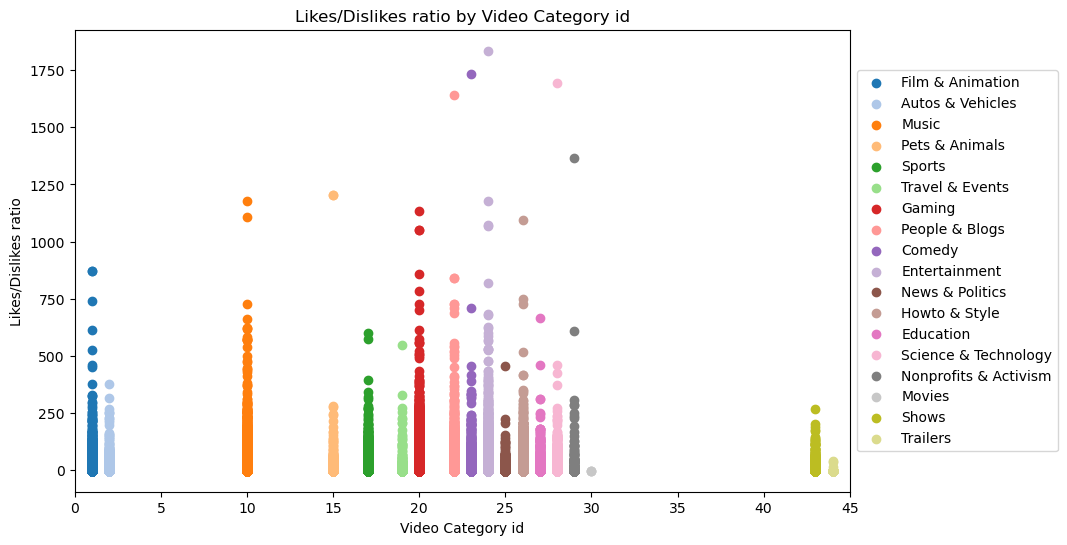

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

video_categories_names = {
    '1': 'Film & Animation',
    '2': 'Autos & Vehicles',
    '10': 'Music',
    '15': 'Pets & Animals',
    '17': 'Sports',
    '19': 'Travel & Events',
    '20': 'Gaming',
    '22': 'People & Blogs',
    '23': 'Comedy',
    '24': 'Entertainment',
    '25': 'News & Politics',
    '26': 'Howto & Style',
    '27': 'Education',
    '28': 'Science & Technology',
    '29': 'Nonprofits & Activism',
    '30': 'Movies',
    '43': 'Shows',
    '44': 'Trailers'
}

video_categories = sorted(like_dislike_subset['videoCategoryId'].unique())

# create a scatter plot for each category
for i, category in enumerate(video_categories):
    x = like_dislike_subset[like_dislike_subset['videoCategoryId'] == category]['videoCategoryId']
    y = like_dislike_subset[like_dislike_subset['videoCategoryId'] == category]['likes/dislikes']
    ax.scatter(x, y, label=video_categories_names[str(category)], color=plt.cm.tab20(i))

ax.set_xlim([0, 45])
ax.set_xlabel('Video Category id')
ax.set_ylabel('Likes/Dislikes ratio')
ax.set_title('Likes/Dislikes ratio by Video Category id')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

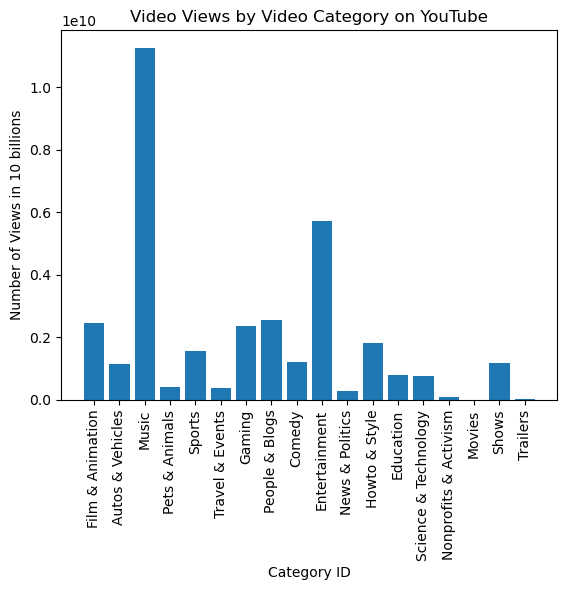

In [15]:
viewCounts = {}

# Getting counts of each category within the data
for i in view_count_subset["videoCategoryId"].unique():
    viewCounts[i] = sum(view_count_subset[view_count_subset["videoCategoryId"] == i].videoViewCount.tolist())

# Sorting the dictionary by category ID and converting the ID's into strings for better graph representation
xVals = list(viewCounts.keys())
xVals.sort()
viewCounts = {key: viewCounts[key] for key in xVals}
xVals = list(map(lambda x: str(x), xVals))

# Giving the columns their associated names
for i in range(len(xVals)):
    xVals[i] = video_categories_names[xVals[i]];

# Plotting the video views by video categories
plt.bar(xVals, viewCounts.values())
plt.xlabel('Category ID')
plt.ylabel('Number of Views in 10 billions')
plt.title('Video Views by Video Category on YouTube')
plt.xticks(rotation=90)
plt.show()

## Perform ML algorithms

### Decision Tree Analysis - Predicting Video Category IDs

Let's try and choose a good 3-4 columns that we think would be good predictors of video category ID.

In [16]:
def preProcessingAll(cols):
    dtData = raw_data.copy()

    # Getting all of our values of interest for the decision tree
    for col in raw_data.columns:
        if (col not in cols):
            dtData = dtData.drop(col, axis='columns')
    
    # Cleaning all -1 values from our subset
    dtSubset = ppNegativeOnes(dtData, dtData.columns)

    return dtSubset

fieldsOfInterest = ["channelViewCount", "videoViewCount", "videoCount", "videoLikeCount", "subscriberCount", "videoCategoryId"]

dtSubset = preProcessingAll(fieldsOfInterest);

#### Splitting Subet Into Training and Test Data

In [15]:
dtPredictors = dtSubset.drop(["videoCategoryId"], axis='columns')
dtTarget = dtSubset["videoCategoryId"]

def splitData(x, y, ts = 0.33):
    xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size=ts)
    return xTrain, xTest, yTrain, yTest

# Splitting data into training and test data, making 33% of data the testing data, and 67% of data training data
dtPred_Train, dtPred_Test, dtTarget_Train, dtTarget_Test = splitData(dtPredictors, dtTarget, 0.33)

#### Fitting our Decision Tree and Making Predictions

In [16]:
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(dtPred_Train, dtTarget_Train)

# Getting the predictions of category IDs from our model
predictions = model.predict(dtPred_Test)

# Seeing how accurate our model was
vvAccuracy = "{:.2f}".format(metrics.accuracy_score(dtTarget_Test, predictions) * 100)
print(f"First Model Accuracy: {vvAccuracy}%")

First Model Accuracy: 21.39%


#### Decision Tree Visualized

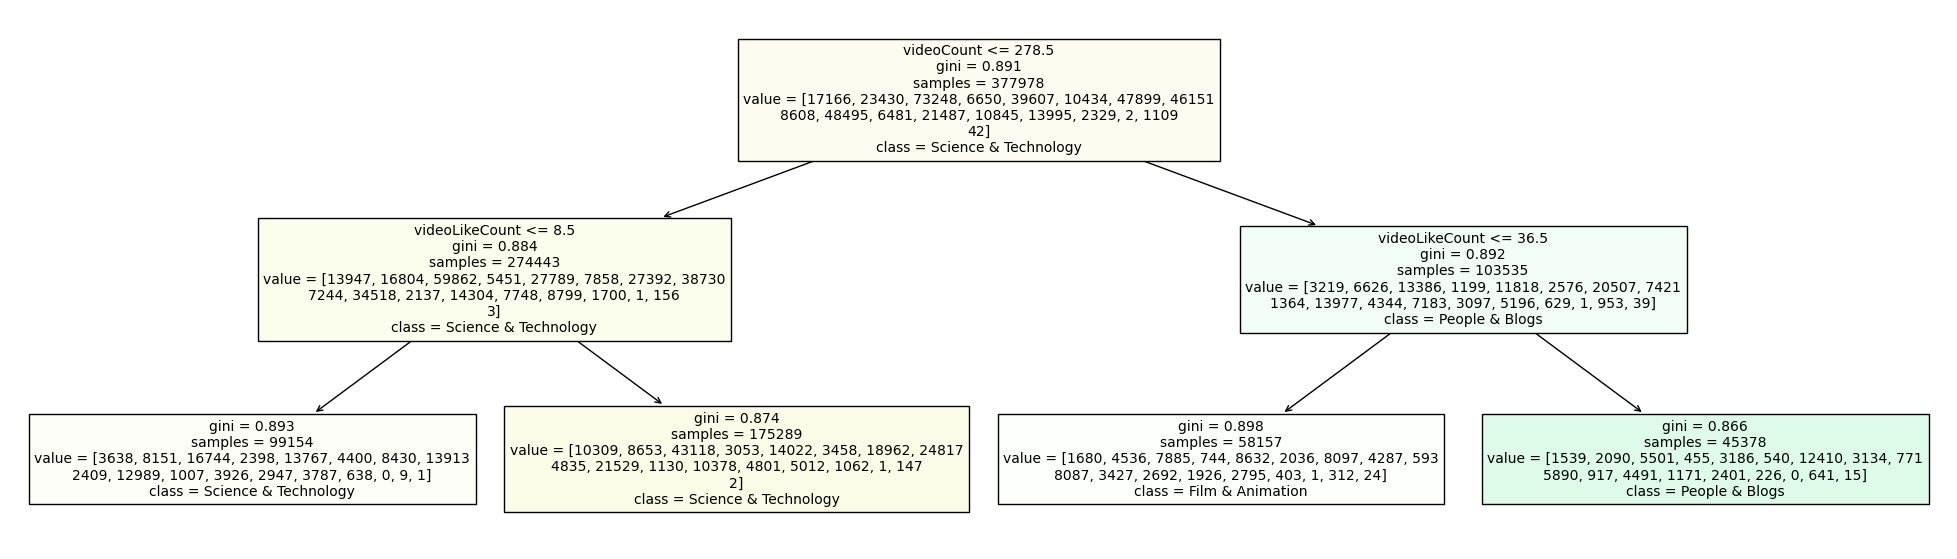

In [17]:
def visualizeTree(w, h, model, features, cName):
    plt.figure(figsize=(w,h))  # set plot size (denoted in inches)
    tree.plot_tree(model, fontsize=10, feature_names=features, filled=True, class_names=cName)
    plt.show()


features = dtPredictors.columns
cNames = [str(x) for x in dtTarget_Test.unique()]
for i in range(len(cNames)):
    cNames[i] = video_categories_names[cNames[i]];

visualizeTree(25, 7, model, features, cNames);

### Improved Decision Tree For Predicting Video Category IDs

Going to add all relevant quantitative predictor variables of our dataset to predict video category ID.

In [18]:
fieldsOfInterest = ["channelViewCount", "videoViewCount", "VideoCommentCount", "videoCount", "dislikes/views", 
                  "videoLikeCount", "subscriberCount", "videoDislikeCount", "videoCategoryId", "views/subscribers", 
                  "likes/subscriber", "comments/subscriber", "likes/views", "channelCommentCount", 
                  "comments/views", "totviews/totsubs", "dislikes/subscriber"]

dtSubset = preProcessingAll(fieldsOfInterest);

dtPredictors = dtSubset.drop(["videoCategoryId"], axis='columns')
dtTarget = dtSubset["videoCategoryId"]

# Splitting data into training and test data, making 33% of data the testing data, and 67% of data training data
dtPred_Train, dtPred_Test, dtTarget_Train, dtTarget_Test = splitData(dtPredictors, dtTarget, 0.33)

In [19]:
model = tree.DecisionTreeClassifier()
model.fit(dtPred_Train, dtTarget_Train)
predictions = model.predict(dtPred_Test);
vvAccuracy = "{:.2f}".format(metrics.accuracy_score(dtTarget_Test, predictions) * 100)
print(f"Max Depth Model Accuracy: {vvAccuracy}%")

Max Depth Model Accuracy: 24.38%


#### Visualization of Predictor Importance in Decision Tree

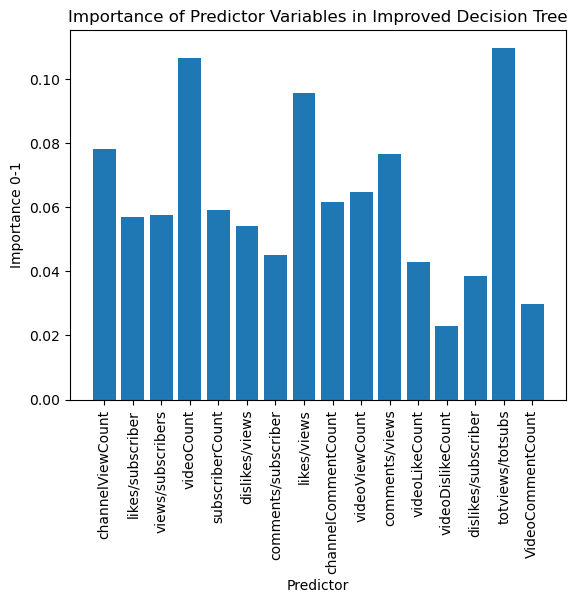

In [20]:
def visualizeImportance(df, xl, yl, title):
    plt.bar(df.keys(), df.values())
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

cleaningZeros = {}

for i in range(len(dtPred_Test.columns)):
    if model.feature_importances_[i] != 0:
        cleaningZeros[dtPred_Test.columns[i]] = model.feature_importances_[i]

visualizeImportance(cleaningZeros, "Predictor", "Importance 0-1", "Importance of Predictor Variables in Improved Decision Tree")

### Random Forests Fitting Model and Accuracy

In [21]:
fieldsOfInterest = ["channelViewCount", "videoViewCount", "VideoCommentCount", "videoCount", "dislikes/subscriber", 
                  "videoLikeCount", "subscriberCount", "videoDislikeCount", "videoCategoryId", "views/subscribers", 
                  "likes/subscriber", "comments/subscriber", "likes/views", "channelCommentCount", 
                  "comments/views", "totviews/totsubs", "dislikes/views"]

rfSubset = preProcessingAll(fieldsOfInterest);
rfPredictors = rfSubset.drop(["videoCategoryId"], axis='columns')
rfTarget = rfSubset["videoCategoryId"]

# Splitting data into training and test data, making 33% of data the testing data, and 67% of data training data
rfPred_Train, rfPred_Test, rfTarget_Train, rfTarget_Test = splitData(rfPredictors, rfTarget, 0.33)

# Fitting model, making predictions, and getting the accuracy
rfModel = ensemble.RandomForestClassifier()
rfModel.fit(rfPred_Train, rfTarget_Train)
predictions = rfModel.predict(rfPred_Test);
vciAccuracy = "{:.2f}".format(metrics.accuracy_score(rfTarget_Test, predictions) * 100)
print(f"Max Depth Model Accuracy: {vciAccuracy}%")

Max Depth Model Accuracy: 34.03%


#### Visualizing Importance of Predictors in Random Forests

**5 Most Important Predictors For Predicting Video Category IDs:**
- **totviews/totsubs:** 0.092
- **videoCount:**       0.087
- **likes/views:**      0.084
- **channelViewCount:** 0.079
- **videoViewCount:**   0.072

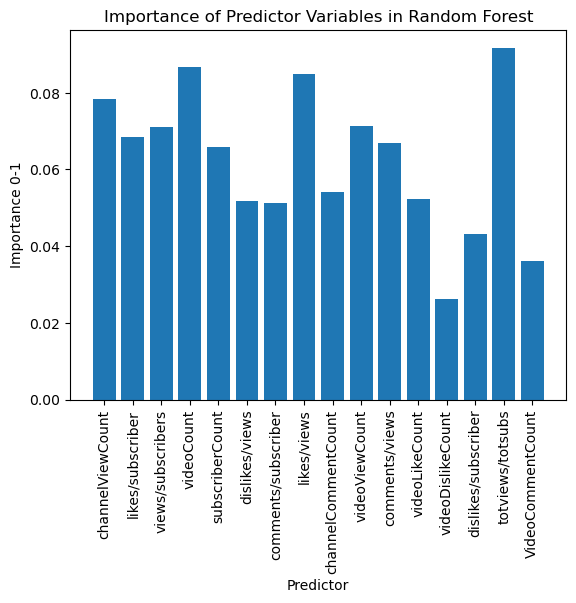

In [22]:
cleaningZeros = {}

for i in range(len(rfPred_Test.columns)):
    if rfModel.feature_importances_[i] != 0:
        cleaningZeros[rfPred_Test.columns[i]] = rfModel.feature_importances_[i]

visualizeImportance(cleaningZeros, "Predictor", "Importance 0-1", "Importance of Predictor Variables in Random Forest")

### Decision Tree Analysis - Predicting Video View Ranges of Videos

#### Cleaning and Splitting Data

In [23]:
fieldsOfInterest = ['videoCategoryId', 'channelViewCount', 'likes/subscriber', 'views/subscribers',
        'videoCount', 'subscriberCount', 'channelelapsedtime', 'comments/subscriber',
        'channelCommentCount', 'videoViewCount', 'totvideos/videocount', 'elapsedtime',
        'videoLikeCount', 'videoDislikeCount', 'VideoCommentCount', "dislikes/subscriber"]

dtSubset = preProcessingAll(fieldsOfInterest)

def applyRange(row):
    if (row['videoViewCount'] < 100000):
        return 0
    elif (row['videoViewCount'] < 500000):
        return 1
    elif (row['videoViewCount'] < 1000000):
        return 2
    else:
        return 3
    
rangeNames = {
    0: '0-99,999',
    1: '100k-499,999',
    2: '500k-999,999',
    3: '1,000,000 or more'
}

# Encodes our predicion column
dtSubset['videoViewsRange'] = dtSubset.apply(applyRange, axis=1)

dtSubset = dtSubset.drop("videoViewCount", axis='columns')
dtPredictors = dtSubset.drop(["videoViewsRange"], axis='columns')
dtTarget = dtSubset["videoViewsRange"]

# Splitting data into training and test data, making 33% of data the testing data, and 67% of data training data
dtPred_Train, dtPred_Test, dtTarget_Train, dtTarget_Test = splitData(dtPredictors, dtTarget, 0.33)

#### Depth 4 Model For Video Views

In [24]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(dtPred_Train, dtTarget_Train)
predictions = model.predict(dtPred_Test);
vvAccuracy = "{:.2f}".format(metrics.accuracy_score(dtTarget_Test, predictions) * 100)
print(f"Depth 4 Model Accuracy: {vvAccuracy}%")

Depth 4 Model Accuracy: 95.54%


##### Depth 4 Tree Visualization

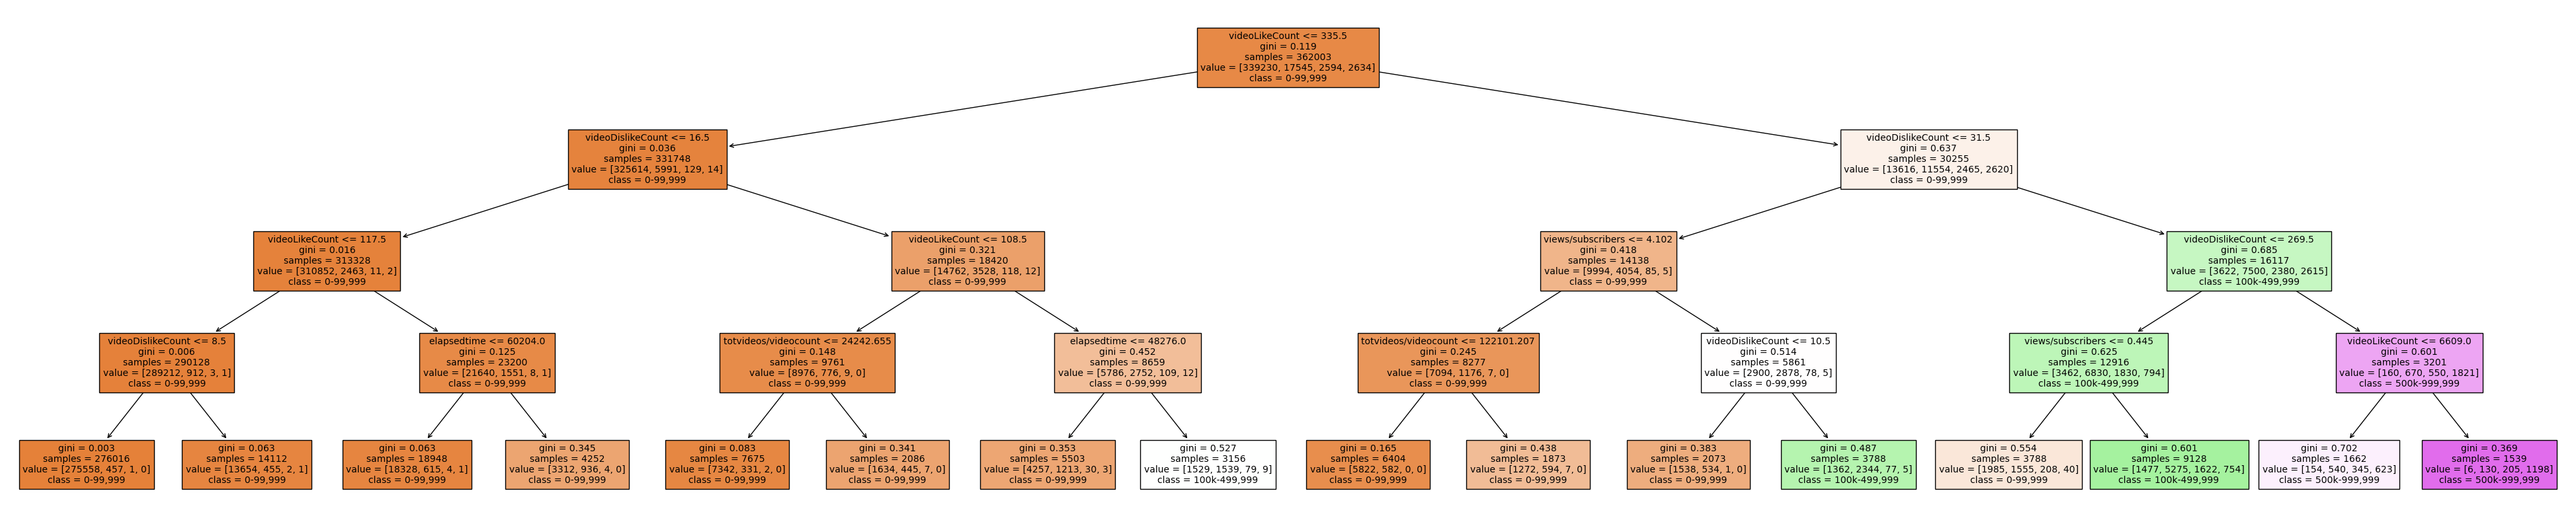

In [25]:
features = dtPredictors.columns
tempNames = dtTarget_Test.unique()
cNames = [];
for i in range(len(tempNames)):
    cNames.append(rangeNames[tempNames[i]]);

visualizeTree(50, 10, model, features, cNames);

#### Depth 5 Model For Video Views

In [26]:
dtSubset = preProcessingAll(fieldsOfInterest)
dtSubset['videoViewsRange'] = dtSubset.apply(applyRange, axis=1)

dtSubset = dtSubset.drop("videoViewCount", axis='columns')
dtPredictors = dtSubset.drop(["videoViewsRange"], axis='columns')
dtTarget = dtSubset["videoViewsRange"]

# Splitting data into training and test data, making 33% of data the testing data, and 67% of data training data
dtPred_Train, dtPred_Test, dtTarget_Train, dtTarget_Test = splitData(dtPredictors, dtTarget, 0.33)

model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(dtPred_Train, dtTarget_Train)
predictions = model.predict(dtPred_Test);
vvAccuracy = "{:.2f}".format(metrics.accuracy_score(dtTarget_Test, predictions) * 100)
print(f"Depth 5 Model Accuracy: {vvAccuracy}%")

Depth 5 Model Accuracy: 95.81%


As we can see, the higher the depth, the more complex our tree gets. Not only this, but the accuracy of our model increases.

In [27]:
features = dtPredictors.columns
tempNames = dtTarget_Test.unique()
cNames = [];
for i in range(len(tempNames)):
    cNames.append(rangeNames[tempNames[i]]);

visualizeTree(175, 50, model, features, cNames);

#### Max Depth Model For Video Views

In [28]:
dtSubset = preProcessingAll(fieldsOfInterest)
dtSubset['videoViewsRange'] = dtSubset.apply(applyRange, axis=1)

dtSubset = dtSubset.drop("videoViewCount", axis='columns')
dtPredictors = dtSubset.drop(["videoViewsRange"], axis='columns')
dtTarget = dtSubset["videoViewsRange"]

# Splitting data into training and test data, making 33% of data the testing data, and 67% of data training data
dtPred_Train, dtPred_Test, dtTarget_Train, dtTarget_Test = splitData(dtPredictors, dtTarget, 0.33)

model = tree.DecisionTreeClassifier()
model.fit(dtPred_Train, dtTarget_Train)
predictions = model.predict(dtPred_Test);
vvAccuracy = "{:.2f}".format(metrics.accuracy_score(dtTarget_Test, predictions) * 100)
print(f"Max Depth Model Accuracy: {vvAccuracy}%")

Max Depth Model Accuracy: 98.39%


**5 Most Important Predictors For Predicting Video Views:**
- **videoLikeCount:**    0.312
- **videoDislikeCount:** 0.216
- **views/subscribers:** 0.139
- **subscriberCount:**   0.131
- **channelViewCount:**  0.091

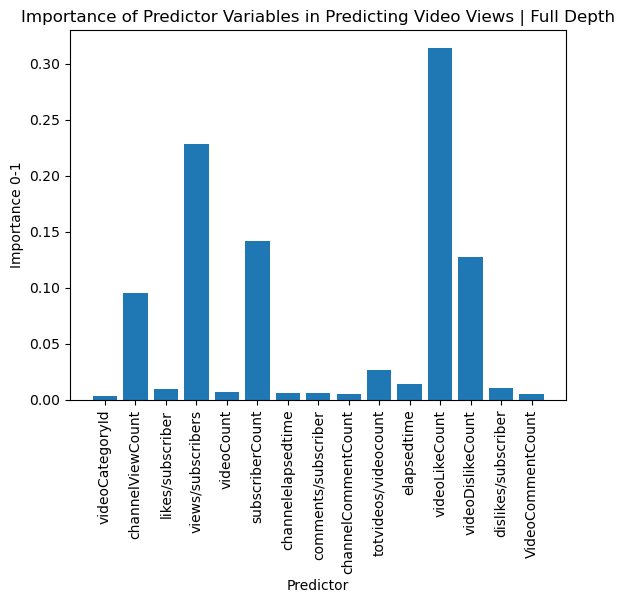

In [29]:
cleaningZeros = {}

for i in range(len(dtPred_Test.columns)):
    if model.feature_importances_[i] != 0:
        cleaningZeros[dtPred_Test.columns[i]] = model.feature_importances_[i]

visualizeImportance(cleaningZeros, "Predictor", "Importance 0-1", "Importance of Predictor Variables in Predicting Video Views | Full Depth")

### Correlation Matrix

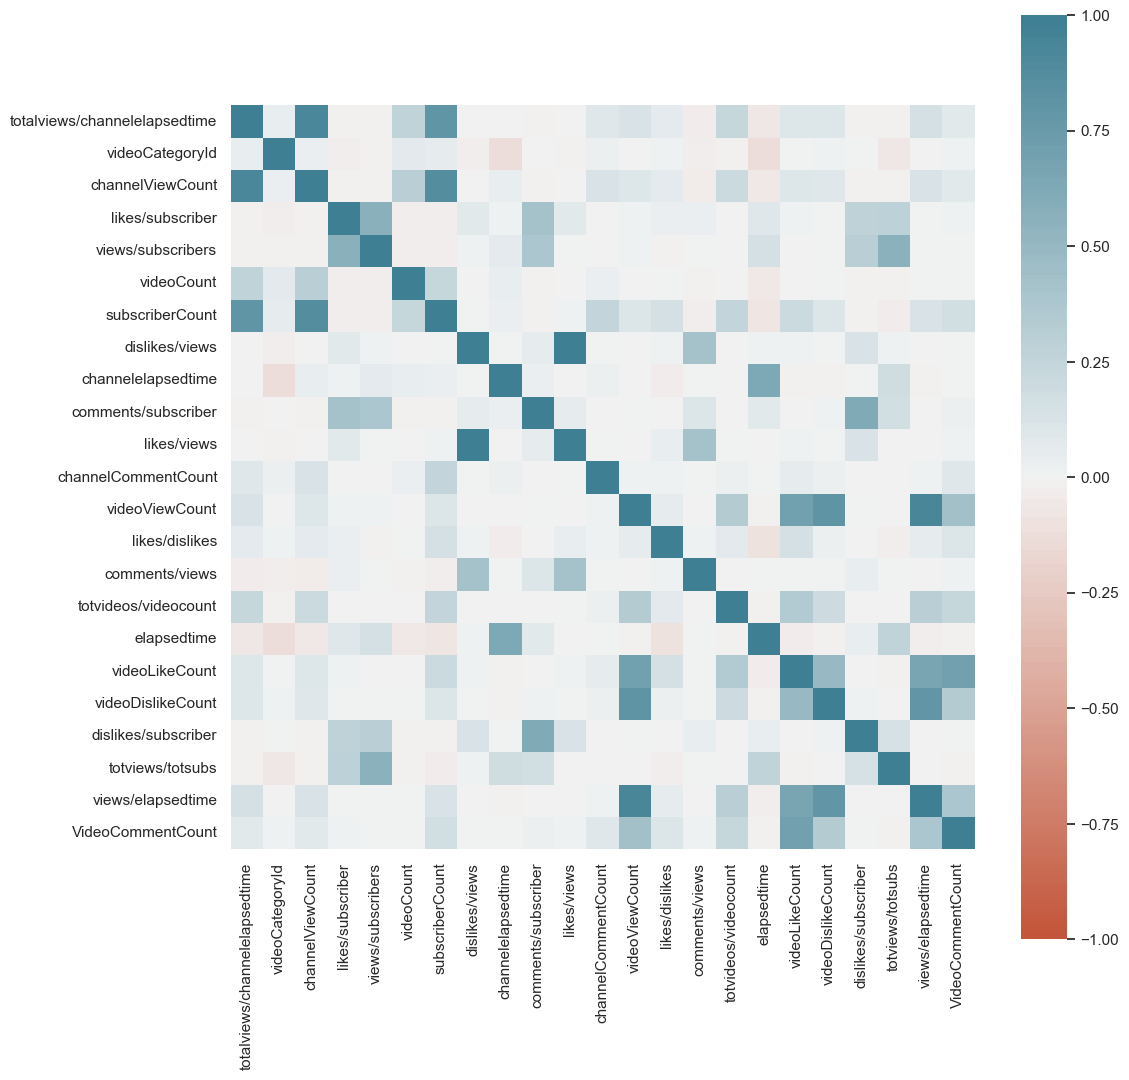

In [136]:
# Add a correlation matrix to show the correlation between the columns
correlation_matrix = raw_data.corr()
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show()

### Linear Regression Model

In [139]:
def do_linear_regression(col_to_train_on, col_to_predict):
  # Preprocessing for linear regression
  ppCols = preProcessingAll([col_to_train_on, col_to_predict])
  X = ppCols[col_to_train_on]
  y = ppCols[col_to_predict]

  # splitting the data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

  # reshaping the data to be 2D
  X_train = np.array(X_train).reshape(-1, 1)
  X_test = np.array(X_test).reshape(-1, 1)

  # creating the linear regression model
  lr = LinearRegression()
  lr.fit(X_train, y_train)

  # equation of the line
  c = lr.intercept_
  m = lr.coef_
  print("y = {} + {}x\n".format(c, m))

  # making predictions on training data
  y_train_pred = lr.predict(X_train)

  # plotting the training data
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
  ax1.scatter(X_train, y_train)
  ax1.set_title("Training Data")
  ax1.set_xlabel(col_to_train_on)
  ax1.set_ylabel(col_to_predict)
  ax1.plot(X_train, y_train_pred, color='red')

  # making predictions on testing data
  y_test_pred = lr.predict(X_test)
  y_test_pred.flatten()

  # plotting the testing data
  ax2.scatter(X_test, y_test)
  ax2.set_title("Testing Data")
  ax2.set_xlabel(col_to_train_on)
  ax2.set_ylabel(col_to_predict)
  ax2.plot(X_test, y_test_pred, color='green')
  r2_score = lr.score(X_test, y_test)
  print("R2 Score: ", r2_score * 100)

#### Predict video view count based on views/elapsed time ratio

y = 2800.746277564118 + [37206.87261816]x

R2 Score:  91.4724342213393


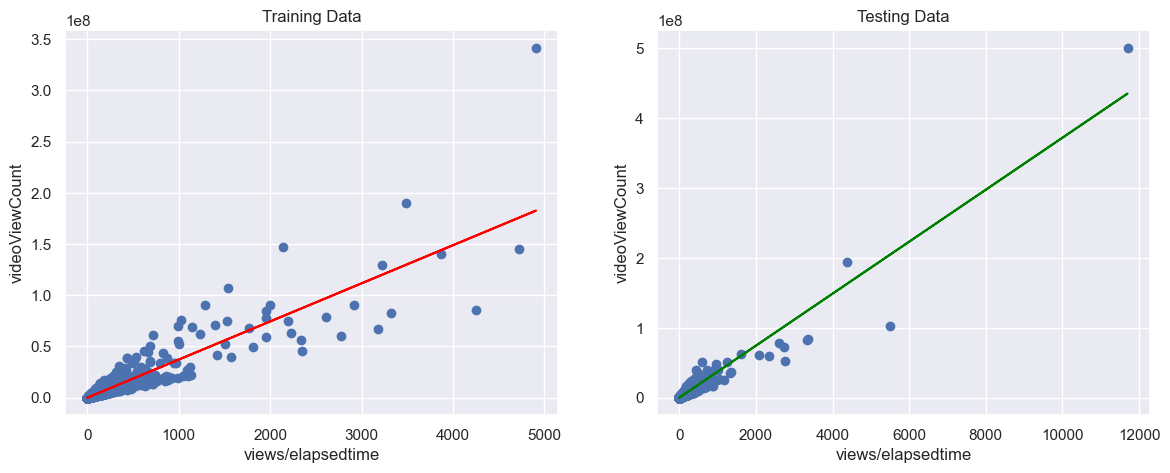

In [143]:
do_linear_regression('views/elapsedtime', 'videoViewCount')

#### Predict subscriber count based on channel view count

y = 26316.91864093567 + [0.00113718]x

R2 Score:  76.74181411617164


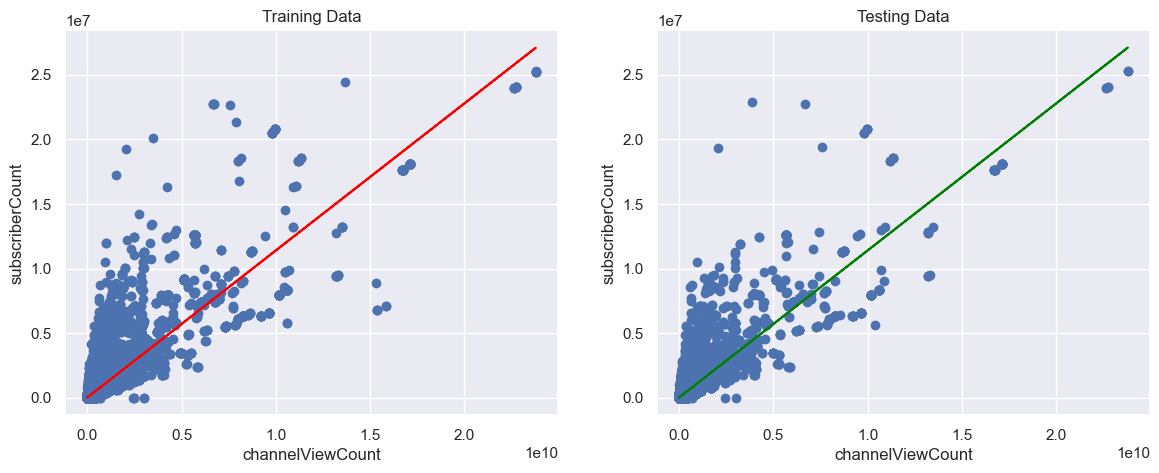

In [146]:
do_linear_regression('channelViewCount', 'subscriberCount')

### Multivariable Regression Model

In [156]:
def do_multiple_linear_regression(cols_to_train_on, col_to_predict):
  ppCols = preProcessingAll(cols_to_train_on)
  X = ppCols.drop(columns = [col_to_predict])
  y = ppCols[col_to_predict]

  # splitting the data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  
  # creating the linear regression model
  lr = LinearRegression()
  lr.fit(X_train, y_train)

  # equation of the line
  c = lr.intercept_
  m = lr.coef_

  # loop through the coefficients and print them using y = c + m1x1 + m2x2 + ... + mnxn
  print("y = {}".format(c), end='')
  for i in range(len(m)):
    print(" + ({})x{}".format(m[i], i + 1), end='')
  print()

  # show appropriate coefficients to their respective columns
  for i in range(len(m)):
    print("%-16s: %.19f" % (cols_to_train_on[i], m[i]))
  print()
  
  # making predictions on training data
  y_train_pred = lr.predict(X_train)

  # making predictions on testing data
  y_test_pred = lr.predict(X_test)

  print("R2 Score: ", r2_score(y_test, y_test_pred) * 100)

  # plotting the training data
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
  ax1.scatter(y_train, y_train_pred)
  ax1.set_title("Training Data")
  ax1.set_xlabel("Actual " + col_to_predict)
  ax1.set_ylabel("Predicted " + col_to_predict)

  # plotting the testing data
  ax2.scatter(y_test, y_test_pred)
  ax2.set_title("Testing Data")
  ax2.set_xlabel("Actual " + col_to_predict)
  ax2.set_ylabel("Predicted " + col_to_predict)

#### Predict subscriber count based on channel view count, video view count, video like count, video dislike count

y = 22204.24198297358 + (0.0011302468433135482)x1 + (-0.0944225267549238)x2 + (27.63880201875441)x3 + (113.230720127054)x4
channelViewCount: 0.0011302468433135482
subscriberCount : -0.0944225267549237968
videoViewCount  : 27.6388020187544114492
videoLikeCount  : 113.2307201270539991356

R2 Score:  78.8678118982456


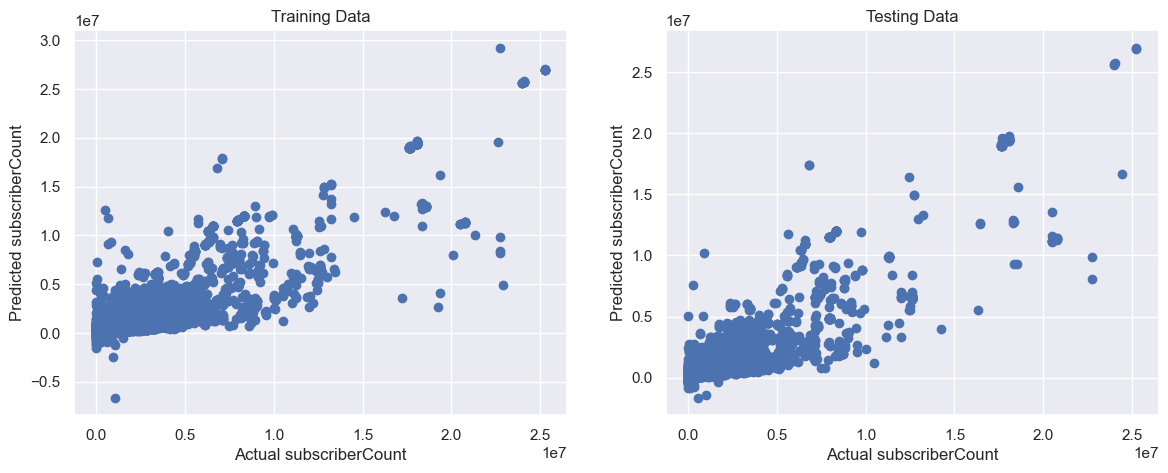

In [160]:
do_multiple_linear_regression(['channelViewCount', 'subscriberCount', 'videoViewCount', 'videoLikeCount', 'videoDislikeCount'], 'subscriberCount')

#### Predict video view count based on a lot of variables

y = 29494.495637845277 + (-508.21456511287056)x1 + (0.00041413616065247527)x2 + (-359.07054568001604)x3 + (7.1331412616695475)x4 + (-0.7737115585204669)x5 + (-0.3559015316629183)x6 + (-16603221.300602237)x7 + (2574.189248300052)x8 + (-2296610.5630159196)x9 + (0.6772216766237839)x10 + (3936818.5966733103)x11 + (136.67595864574102)x12 + (1887.487537183144)x13 + (-9470.838068334413)x14 + (-0.6440209526630403)x15 + (-301.4955903466249)x16
channelViewCount: -508.2145651128705594601
videoViewCount  : 0.0004141361606524753
VideoCommentCount: -359.0705456800160391140
videoCount      : 7.1331412616695475393
dislikes/views  : -0.7737115585204669133
videoLikeCount  : -0.3559015316629183245
subscriberCount : -16603221.3006022367626428604
videoDislikeCount: 2574.1892483000519860070
videoCategoryId : -2296610.5630159196443855762
views/subscribers: 0.6772216766237838526
likes/subscriber: 3936818.5966733102686703205
comments/subscriber: 136.6759586457410193816
likes/views     : 1887.487537183144013397

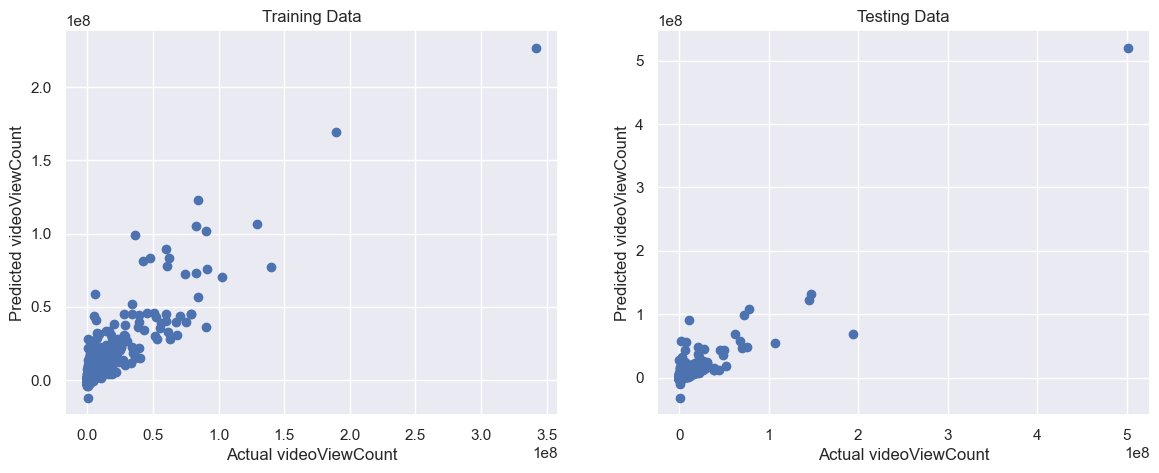

In [159]:
fieldsOfInterest = ["channelViewCount", "videoViewCount", "VideoCommentCount", "videoCount", "dislikes/views", 
                  "videoLikeCount", "subscriberCount", "videoDislikeCount", "videoCategoryId", "views/subscribers", 
                  "likes/subscriber", "comments/subscriber", "likes/views", "channelCommentCount", 
                  "comments/views", "totviews/totsubs", "dislikes/subscriber"]
do_multiple_linear_regression(fieldsOfInterest, 'videoViewCount')